## Final Project- Email Marketing Campaign


During a period of two weeks following the email campaign, results were tracked. Historical customer attributes at your disposal include:

    Recency: Months since last purchase.
    History_Segment: Categorization of dollars spent in the past year.
    History: Actual dollar value spent in the past year.
    Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
    Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
    Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
    Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
    Channel: Describes the channels the customer purchased from in the past year.
    Segment: describes the email campaign the customer received: Mens Email, Womens Email, No Email.
    Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks after the email campaign.



** Importing the necessary libraries for running different models, finding accuracy scores and plotting different graphs for better visualization**

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,recall_score,precision_score,roc_curve,accuracy_score,log_loss
from sklearn.utils import resample
from sklearn.metrics import f1_score,recall_score,precision_score,roc_curve,accuracy_score,log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
import statsmodels.api as sm 



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


##### Importing the dataset 

In [2]:
campaign = pd.read_csv("C:\\Users\\mercu\\OneDrive\\ML\\UC\\ML\\Project\\training.csv")

In [3]:
campaign.head(10)

,ID,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit
0,17910,1,"6) $750 - $1,000",882.35,1,0,Surburban,1,Multichannel,Mens E-Mail,1
1,20951,1,1) $0 - $100,41.57,0,1,Urban,1,Phone,Womens E-Mail,1
2,3829,1,2) $100 - $200,120.59,0,1,Urban,1,Phone,No E-Mail,0
3,14103,1,3) $200 - $350,336.72,0,1,Urban,0,Phone,Womens E-Mail,0
4,25748,9,1) $0 - $100,29.99,0,1,Surburban,1,Phone,No E-Mail,0
5,54367,6,4) $350 - $500,396.79,1,1,Rural,0,Multichannel,No E-Mail,0
6,19798,10,4) $350 - $500,378.47,1,0,Urban,0,Phone,No E-Mail,0
7,44854,1,1) $0 - $100,99.01,1,0,Urban,1,Phone,No E-Mail,1
8,4206,7,1) $0 - $100,29.99,1,0,Urban,0,Phone,No E-Mail,1
9,2370,10,1) $0 - $100,86.18,0,1,Urban,1,Web,Mens E-Mail,0


##### Getting an understanding of the dataset

In [190]:
print(campaign.describe())

                 ID       recency       history          mens        womens  \
count  44800.000000  44800.000000  44800.000000  44800.000000  44800.000000   
mean   32055.449598      5.768415    242.244079      0.551429      0.550179   
std    18467.723823      3.508881    255.761534      0.497354      0.497481   
min        3.000000      1.000000     29.990000      0.000000      0.000000   
25%    16035.000000      2.000000     65.087500      0.000000      0.000000   
50%    32034.500000      6.000000    158.770000      1.000000      1.000000   
75%    48079.250000      9.000000    325.635000      1.000000      1.000000   
max    63998.000000     12.000000   3345.930000      1.000000      1.000000   

             newbie         visit  
count  44800.000000  44800.000000  
mean       0.501272      0.146339  
std        0.500004      0.353450  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      0.000000  


In [191]:
# Finding out if we have any null values in our dataset
print(campaign.isnull().sum())

ID                 0
recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
segment            0
visit              0
dtype: int64


In [192]:
campaign.dtypes 

ID                   int64
recency              int64
history_segment     object
history            float64
mens                 int64
womens               int64
zip_code            object
newbie               int64
channel             object
segment             object
visit                int64
dtype: object

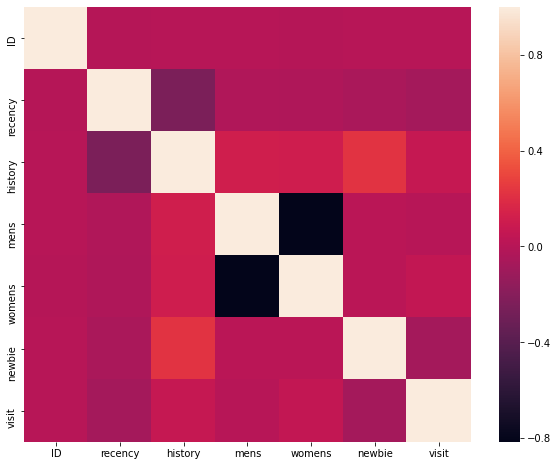

In [4]:
f, ax = plt.subplots(figsize=(10, 8))
corr = campaign.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

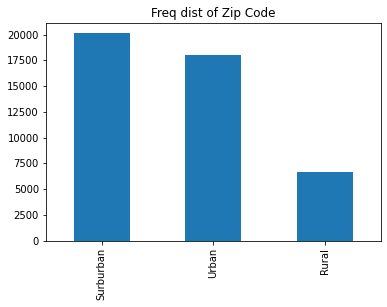

In [5]:
campaign['zip_code'].value_counts().plot.bar(title='Freq dist of Zip Code')

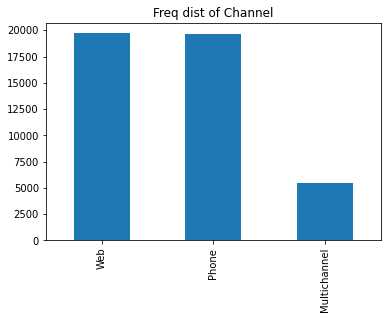

In [6]:
campaign['channel'].value_counts().plot.bar(title='Freq dist of Channel')

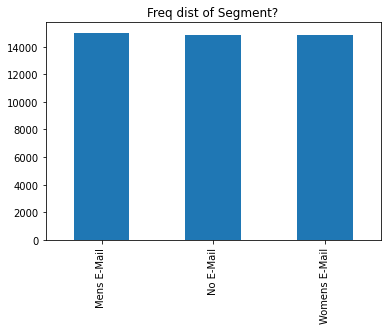

In [7]:
campaign['segment'].value_counts().plot.bar(title='Freq dist of Segment?')

**Objects/ categorical data types should be converted to numerical types before applying any ML algorithms. Therefore, one hot encoding them**

In [193]:
campaign_testing = pd.get_dummies(campaign, ['zip_code', 'channel', 'segment','history_segment'])

In [194]:
campaign_testing.head()

,ID,recency,history,mens,womens,newbie,visit,zip_code_1) $0 - $100,zip_code_2) $100 - $200,zip_code_3) $200 - $350,...,"zip_code_7) $1,000 +",channel_Rural,channel_Surburban,channel_Urban,segment_Multichannel,segment_Phone,segment_Web,history_segment_Mens E-Mail,history_segment_No E-Mail,history_segment_Womens E-Mail
0,17910,1,882.35,1,0,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,20951,1,41.57,0,1,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
2,3829,1,120.59,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,14103,1,336.72,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,25748,9,29.99,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [195]:
campaign_testing.drop(['zip_code_7) $1,000 +'],axis = 1  )

,ID,recency,history,mens,womens,newbie,visit,zip_code_1) $0 - $100,zip_code_2) $100 - $200,zip_code_3) $200 - $350,...,"zip_code_6) $750 - $1,000",channel_Rural,channel_Surburban,channel_Urban,segment_Multichannel,segment_Phone,segment_Web,history_segment_Mens E-Mail,history_segment_No E-Mail,history_segment_Womens E-Mail
0,17910,1,882.35,1,0,1,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
1,20951,1,41.57,0,1,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1
2,3829,1,120.59,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,14103,1,336.72,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,25748,9,29.99,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44795,52468,12,86.79,0,1,1,1,1,0,0,...,0,0,1,0,0,1,0,1,0,0
44796,62754,5,29.99,0,1,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
44797,52388,2,245.27,1,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
44798,56645,10,29.99,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


** Dropping one level of hot encoding to avoid the dummy trap**

In [196]:
campaign_testing.drop(['zip_code_7) $1,000 +','channel_Surburban', 'segment_Web', 'history_segment_No E-Mail'],axis = 1, inplace = True )

In [197]:
campaign_testing.head()

,ID,recency,history,mens,womens,newbie,visit,zip_code_1) $0 - $100,zip_code_2) $100 - $200,zip_code_3) $200 - $350,zip_code_4) $350 - $500,zip_code_5) $500 - $750,"zip_code_6) $750 - $1,000",channel_Rural,channel_Urban,segment_Multichannel,segment_Phone,history_segment_Mens E-Mail,history_segment_Womens E-Mail
0,17910,1,882.35,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0
1,20951,1,41.57,0,1,1,1,1,0,0,0,0,0,0,1,0,1,0,1
2,3829,1,120.59,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0
3,14103,1,336.72,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
4,25748,9,29.99,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [198]:
campaign_testing.drop(['ID'], axis = 1, inplace = True) #ID is just a random number and has no influence in predictions

In [199]:
# class distribution
print(campaign.groupby('visit').size())

visit
0    38244
1     6556
dtype: int64


We will now see the chunk of people visiting the site after email campaign

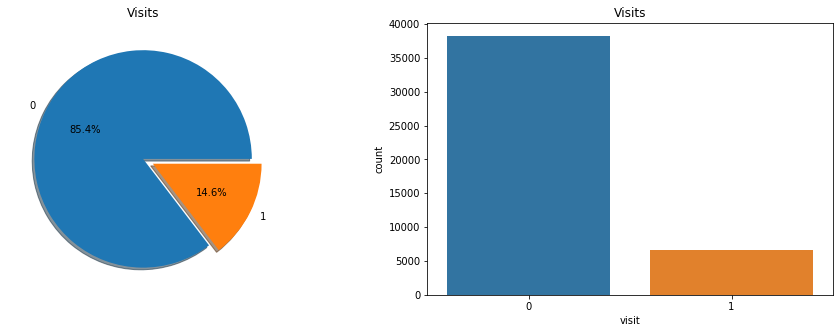

In [200]:
#How many Visited??

f,ax=plt.subplots(1,2,figsize=(16,5))
campaign['visit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Visits')
ax[0].set_ylabel('')
sns.countplot('visit',data=campaign,ax=ax[1])
ax[1].set_title('Visits')
plt.show()

#### Observation from above graph

This is an interesting observation. In business terms, having a visit percentage of 14.6% (with respect to un-opened) is good. However, while applying the machine learning models, its advised to have balanced data of visits and non-visits. Therefore, its a good idea to have upsampling the data. 

But before doing that, lets apply a model to see the performance without upsampling. 

**We will now split the model into train and test data set and apply it into different models**

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(campaign_testing.drop("visit", axis=1), campaign_testing['visit'] , test_size = 0.2,\
random_state=180)

**1. Random Forest**

In [202]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)

Prediction on the test dataset

In [203]:
rfc_pred = rfc.predict(X_test)

In [204]:
print("accuracy = ", accuracy_score(Y_test, rfc_pred), "\nprecision_score = ", precision_score(Y_test, rfc_pred),"\nf1 Score =",f1_score(Y_test, rfc_pred), "\nrecall_score = ", recall_score(Y_test, rfc_pred))

accuracy =  0.8142857142857143 
precision_score =  0.17647058823529413 
f1 Score = 0.10633727175080561 
recall_score =  0.07609531129900077


This is an interesting observation. The accuracy seems to be good. However the Precision, f1 score and recall_score are very poor.

Accuracy is how close a measurement is to the correct value for that measurement. The precision of a measurement system is refers to how close the agreement is between repeated measurements 

Consider a bullseye. High accuracy and low precision is like having all the hits closer to the center, but none are close to each other; this is an example of accuracy without precision.

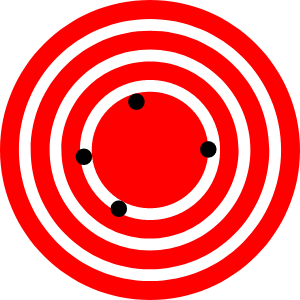

Lets further evaluate by having one more method ( logistics regression).

**2. Logistic Regression**

In [205]:
logit = LogisticRegression()

In [206]:
result = logit.fit(X_train, Y_train)

C:\Users\mercu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [207]:
probability_predictions=result.predict_proba(X_test)

In [208]:
probability_predictions

array([[0.80626827, 0.19373173],
       [0.77630419, 0.22369581],
       [0.88633645, 0.11366355],
       ...,
       [0.91164795, 0.08835205],
       [0.72423664, 0.27576336],
       [0.90158004, 0.09841996]])

In [209]:
logit.classes_

array([0, 1], dtype=int64)

In [210]:
predictions_log = np.where(probability_predictions[:,1]> 0.5 ,1,0)

In [211]:
accuracy=sum(predictions_log==Y_test)/len(Y_test)
print(accuracy)

0.8547991071428571


In [212]:
log_loss(Y_test,predictions_log)

5.015061259975026

In [213]:
confusion_matrix= confusion_matrix(Y_test,predictions_log)

In [214]:
confusion_df= pd.DataFrame(confusion_matrix,index=['Actual No-visits','Actual visits']
                           ,columns=['Predicted No-visits','Predicted visits'])

In [215]:
confusion_df

,Predicted No-visits,Predicted visits
Actual No-visits,7658,1
Actual visits,1300,1


**Explaination on Confusion Matrix**

Number of customers who were predicted to be not visiting and didnt visit the website are 7658
Number of customers who were predicted to visit and actually didnt visited are 1
Number of customers who were predicted not visiting and actually visited are 1300 
Number of customers who were predicted to be visiting and actually visited are 1

'1300' customers of 8760 have visited the website but our model couldn't predict it correctly. This is a very huge number that will deeply impact the business decisions. Think of them as customers who were potential to be re-purchasing and have visited the website (after the email campaign) and the company missed the chance to convert them by not identifying them.

Though '7658' customers have been correctly identified as not visiting the website and have actually not visited is good, the value that the company has over '1300' is too less. That is, company is losing out a lot by not predicting the 1300 than correctly predicting 7658!

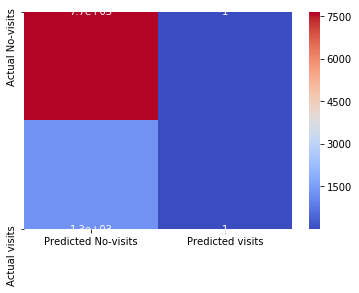

In [216]:
_=sns.heatmap(confusion_df,cmap='coolwarm',annot=True)

Explaination : Running above logistic regression model and plotting the confusion matrix, we see that although accuracy of the model is 0.85, the f1 score and recall scores are very poor. This again shows accuracy without precision. With both the models ( Random Forest and Logistic Regression ) we see that the precion scores are very poor. We will now upsample our data, run our models again and see if our precion score improves

In [217]:
print("accuracy = ", accuracy_score(Y_test, predictions_log), "\nprecision_score = ", precision_score(Y_test, predictions_log),"\nf1 Score =",f1_score(Y_test, predictions_log), "\nrecall_score = ", recall_score(Y_test, predictions_log))

accuracy =  0.8547991071428571 
precision_score =  0.5 
f1 Score = 0.0015349194167306216 
recall_score =  0.0007686395080707148


Finding the AUC score ( for predicting if the classifier is good or bad)

In [218]:
auc = roc_auc_score(Y_test,predictions_log)
print(auc)

0.5003190370800571


In [219]:
fpr,tpr,threshold = roc_curve(Y_test,probability_predictions[:,1])


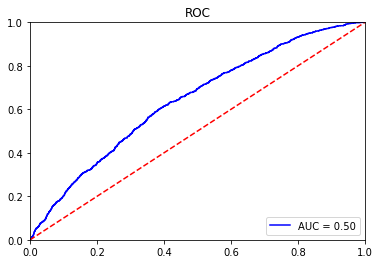

In [220]:
plt.title('ROC')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

Therefore, by looking at various performance metrics which shows poor results from Random Forest and Logisitcs regression, it can be said that we need to do sampling before having the modeling.

Lets do upsampling by getting visit '1's numberically equal to the number of '0's

##### Upsampling

In [221]:
campaign_majority = campaign_testing[campaign_testing.visit==0]
campaign_minority=campaign_testing[campaign_testing.visit==1]

In [222]:
minority_upsampled = resample(campaign_minority,replace=True,n_samples=38244,random_state=45)

In [223]:
minority_upsampled.shape[0]

38244

In [224]:
complete=pd.concat([campaign_majority,minority_upsampled])


In [225]:
complete.visit.value_counts()
campaign_testing=complete.copy()
print(campaign_testing.visit.value_counts())

1    38244
0    38244
Name: visit, dtype: int64


In [226]:
campaign_testing

,recency,history,mens,womens,newbie,visit,zip_code_1) $0 - $100,zip_code_2) $100 - $200,zip_code_3) $200 - $350,zip_code_4) $350 - $500,zip_code_5) $500 - $750,"zip_code_6) $750 - $1,000",channel_Rural,channel_Urban,segment_Multichannel,segment_Phone,history_segment_Mens E-Mail,history_segment_Womens E-Mail
2,1,120.59,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0
3,1,336.72,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1
4,9,29.99,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0
5,6,396.79,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
6,10,378.47,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26262,6,788.76,1,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0
19099,7,717.99,1,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0
38543,3,319.11,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1
2465,7,167.13,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0



#### Lets apply the re-sampled data to Random Forest Classifier and Logistics Regression 

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(campaign_testing.drop("visit", axis=1), campaign_testing['visit'] , test_size = 0.2,\
random_state=180)

##### Random forest after  upsampling

In [228]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, Y_train)

In [229]:
rfc_pred = rfc.predict(X_test)

In [230]:
print("accuracy = ", accuracy_score(Y_test, rfc_pred), "\nprecision_score = ", precision_score(Y_test, rfc_pred),"\nf1 Score =",f1_score(Y_test, rfc_pred), "\nrecall_score = ", recall_score(Y_test, rfc_pred))

accuracy =  0.8961955811217153 
precision_score =  0.8510982658959537 
f1 Score = 0.9026483570377636 
recall_score =  0.9608457321848082


It can be clearly seen that the performance evaluation metrics have improved to many folds by having up-sampling the data. 

In [234]:
confusion_matrix_rf= confusion_matrix(Y_test,rfc_pred)

In [235]:
confusion_df_rf= pd.DataFrame(confusion_matrix_rf,index=['Actual No-visits','Actual visits']
                           ,columns=['Predicted No-visits','Predicted visits'])

In [236]:
confusion_df_rf

,Predicted No-visits,Predicted visits
Actual No-visits,6348,1288
Actual visits,300,7362


Explaination on Confusion Matrix from Random Forest:

As we can see that these metrics are lot better than the one from Logistics Regression. 

This model can accurately predict '6341' who haven't visited and '7364' who have actually visited the website. '298' customers have actually visited but the model predicts them they haven't.(which is a lot less than earlier). 

In [237]:
logit_new = LogisticRegression()

In [238]:
result = logit_new.fit(X_train, Y_train)

C:\Users\mercu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [239]:
probability_predictions_new=result.predict_proba(X_test)

In [240]:
probability_predictions_new

array([[0.53784477, 0.46215523],
       [0.62697687, 0.37302313],
       [0.47177176, 0.52822824],
       ...,
       [0.51077485, 0.48922515],
       [0.55942451, 0.44057549],
       [0.45661339, 0.54338661]])

In [241]:
logit.classes_

array([0, 1], dtype=int64)

In [242]:
predictions_log_new = np.where(probability_predictions_new[:,1]> 0.5 ,1,0)

In [243]:
accuracy=sum(predictions_log_new==Y_test)/len(Y_test)
print(accuracy)

0.6055693554713034


In [244]:
log_loss(Y_test,predictions_log_new)

13.623311984142841

In [245]:
confusion_matrix= confusion_matrix(Y_test,predictions_log_new)

In [246]:
confusion_df= pd.DataFrame(confusion_matrix,index=['Actual No-visits','Actual visits']
                           ,columns=['Predicted No-visits','Predicted visits'])

In [247]:
confusion_df

,Predicted No-visits,Predicted visits
Actual No-visits,4572,3064
Actual visits,2970,4692


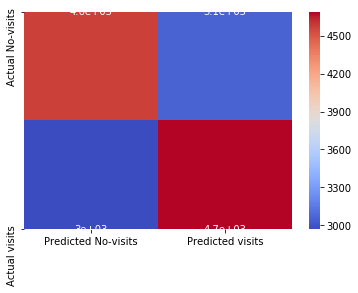

In [248]:
_=sns.heatmap(confusion_df,cmap='coolwarm',annot=True)

In [249]:
print("accuracy = ", accuracy_score(Y_test, predictions_log_new), "\nprecision_score = ", precision_score(Y_test, predictions_log_new),"\nf1 Score =",f1_score(Y_test, predictions_log_new), "\nrecall_score = ", recall_score(Y_test, predictions_log_new))

accuracy =  0.6055693554713034 
precision_score =  0.6049510056730273 
f1 Score = 0.6086392528213777 
recall_score =  0.6123727486296007


In [250]:
auc = roc_auc_score(Y_test,predictions_log_new)
print(auc)

0.6055577729528308


In [251]:
fpr,tpr,threshold = roc_curve(Y_test,probability_predictions_new[:,1])


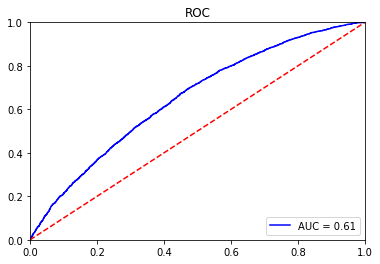

In [252]:
plt.title('ROC')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f' % auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [253]:
optimal_idx=np.argmax(tpr-fpr)
optimal_threshlold = threshold[optimal_idx]

In [254]:
optimal_threshlold

0.4703767606603408

In [255]:
probability_predictions_new_updated = np.where(probability_predictions_new[:,1]>optimal_threshlold, 1, 0)

In [259]:
new_confusion_mat = confusion_matrix(Y_test, probability_predictions_new_updated)

In [260]:
confusion_df= pd.DataFrame(new_confusion_mat,index=['Actual No-visits','Actual visits']
                           ,columns=['Predicted No-visits','Predicted visits'])

In [261]:
confusion_df

,Predicted No-visits,Predicted visits
Actual No-visits,4015,3621
Actual visits,2314,5348


In [262]:
auc = roc_auc_score(Y_test,probability_predictions_new_updated)
print(auc)

0.611894464241495


**3. Support vector classifier (SVC)**

In [263]:
#Please note that the below code runs too long. Hence I've commented the first line. However, I've tried this to be working. 

In [264]:
#clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train, Y_train)

In [ ]:
clf.predict(X_test)

In [ ]:
predicted_classes_svc = probabilities.map(lambda x: 'pos' if x > 0.5 else 'neg')

In [ ]:
predicted_classes_svcn = predicted_classes_svc.map(lambda x: 1 if x == 'pos' else 0)

In [ ]:
accuracy = sum(predicted_classes_svcn == Y_test) / len(Y_test)

In [ ]:
accuracy

In [ ]:
confusion_mat = confusion_matrix(Y_test, predicted_classes)

In [ ]:
confusion_df_svc = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'])

In [ ]:
confusion_df_svc

In [ ]:
precision_score(Y_test, predicted_classes)

In [ ]:
recall_score(Y_test, predicted_classes)

**4.Kneighbours**

In [265]:
from sklearn.neighbors import KNeighborsClassifier

In [266]:
knn = KNeighborsClassifier(n_neighbors=3)

In [267]:
result_knn= knn.fit(X_train, Y_train)

In [268]:
Y_pred = knn.predict(X_test)

In [269]:
probability_predictions_new=result_knn.predict_proba(X_test)

In [270]:
predictions_kneig = np.where(probability_predictions_new[:,1]> 0.5 ,1,0)

In [271]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, predictions_kneig))

Accuracy: 0.8174271146555105


In [272]:
print("accuracy = ", accuracy_score(Y_test, predictions_kneig), "\nprecision_score = ", precision_score(Y_test, predictions_kneig),"\nf1 Score =",f1_score(Y_test, predictions_kneig), "\nrecall_score = ", recall_score(Y_test, predictions_kneig))

accuracy =  0.8174271146555105 
precision_score =  0.7548947754161868 
f1 Score = 0.8377389182594551 
recall_score =  0.9410075698251109


** Kneighbours model gives an accuracy of 0.81 with f1score as 0.83 and recall score as 0.94

**5. Gaussian Naive Bayes model**

In [273]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [274]:
gnb = GaussianNB()

In [275]:
result_gnb = gnb.fit(X_train, Y_train)

In [276]:
Y_pred_gnb = gnb.predict(X_test)

In [277]:
probability_predictions_new=result_gnb.predict_proba(X_test)

In [278]:
predictions_gnb = np.where(probability_predictions_new[:,1]> 0.5 ,1,0)

In [279]:
print("accuracy = ", accuracy_score(Y_test, predictions_gnb), "\nprecision_score = ", precision_score(Y_test, predictions_gnb),"\nf1 Score =",f1_score(Y_test, predictions_gnb), "\nrecall_score = ", recall_score(Y_test, predictions_gnb))

accuracy =  0.5698784154791476 
precision_score =  0.5885723641126391 
f1 Score = 0.5221496005809731 
recall_score =  0.4691986426520491


**6. ADaBoost Classifier**

In [280]:
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=200, learning_rate=0.01, random_state=123)

In [281]:
ada_model.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [282]:
predictions = ada_model.predict(X_test)

In [283]:
print("accuracy = ", accuracy_score(Y_test, predictions), "\nprecision_score = ", precision_score(Y_test, predictions),"\nf1 Score =",f1_score(Y_test, predictions), "\nrecall_score = ", recall_score(Y_test, predictions))

accuracy =  0.7570924303830566 
precision_score =  0.7417299681450625 
f1 Score = 0.7651668351870575 
recall_score =  0.7901331245105716


In [284]:
rfc.feature_importances_

array([0.19479642, 0.61428363, 0.01323081, 0.01255309, 0.01996887,
       0.00611618, 0.00418757, 0.00475862, 0.00382294, 0.00406579,
       0.00294078, 0.01716042, 0.02496005, 0.01418121, 0.02028714,
       0.02027568, 0.02241082])

**Calculating the feature importance of each feature in the dataset towards the visit **

**We have selected Random Forest as it has the best overall performance metrics**

In [286]:
pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending = False)

history                          0.614284
recency                          0.194796
channel_Urban                    0.024960
history_segment_Womens E-Mail    0.022411
segment_Phone                    0.020287
history_segment_Mens E-Mail      0.020276
newbie                           0.019969
channel_Rural                    0.017160
segment_Multichannel             0.014181
mens                             0.013231
womens                           0.012553
zip_code_1) $0 - $100            0.006116
zip_code_3) $200 - $350          0.004759
zip_code_2) $100 - $200          0.004188
zip_code_5) $500 - $750          0.004066
zip_code_4) $350 - $500          0.003823
zip_code_6) $750 - $1,000        0.002941
dtype: float64

Explaination to how these feature importances will impact the business are on the PPT shared alongside